# Implementation of PCA-n2v for MSI datasets

In [1]:
# Main imports

#from utils.utils import compute_scores, denoise_scores, load_data, reconstruct, memory_alloc, reshape_2d
import numpy as np
import os
import matplotlib.pyplot as plt
from tifffile import imread

Load data and prepare for training.

In [2]:
%run utils.ipynb
f_dir = r'H:/models' 
model_name = 'algae'
shape = (1024,1024,189)
data = load_data('H:/Coela_Raw.npz')


## Note on file formats

Our data is stored as .npz file, which is a compressed format from scipy.sparse. We highly recommend it for MSI datasets which usually mostly comprise large regions where counts are zeros.

This code comprises converters to and from .npz data to .tif data.

If your data is in the format of .tif data, we have implemented a function that reads 

Our data is stored as .npz file, which is a compressed format. We highly recommend it for MSI datasets

For the notebook to execute faster we will be here binnning the dataset to reduce its size.
We recommend to use the full data for efficient training.

In [3]:
# This step is only to reduce to data to make the code run fast on any standard computer, but it should be removed if you want
# to denoise real data!

from skimage.measure import block_reduce

data = data.reshape(shape)
data = block_reduce(data, (2,2,10)) #binning the data in the x, y and m/z dimensions simultaneously
new_shape = data.shape

We are now ready to perform the PCA. The scores will be saved as .npy matrix of dimensions (n_pixels, n_mz).

In [4]:
scores = compute_scores(data, f_dir, d_name= model_name,save = True).astype('float32')
scores = scores.reshape(new_shape)
print(scores.shape)

Computing scores...
(512, 512, 19)


We are now ready to train!

The function denoise_scores will be processing each of the score image independently and saving the denoised result and train history in the models folder.

The parameters are the following:
- patch_shape: set to (64,64) and (16,16,16) respectively for 2D and 3D images. You can change this shape, especially if the x, y and z dimensions are not equivalent spatially (case of layered materials for instance) but the numbers must remain divisible by 8.
- batch_size: We recommend adapting this to the capabilities of your computing unit for best performance.
- train_epochs: Set here to 10 for faster execution, but should be of at least 100 for the training and validation losses to converge.
- split_val: ratio between validation and training patches.

In [5]:
for j in range(scores.shape[-1]):
    denoise_scores(j, scores[...,j],
                   patch_shape = (64,64),
                   batch_size=128,
                   basedir=f_dir, model_name=model_name,
                   train_epochs = 5,
                   split_val = 0.9)

Denoising score 0...
Augmenting data...
Data was augmented by a factor 8.
Generated patches: (512, 64, 64, 1)
Generated patches: (512, 64, 64, 1)
Generated patches: (512, 64, 64, 1)
Generated patches: (512, 64, 64, 1)
Generated patches: (512, 64, 64, 1)
Generated patches: (512, 64, 64, 1)
Generated patches: (512, 64, 64, 1)
Generated patches: (512, 64, 64, 1)


C:\Python\env_metrocarac\lib\site-packages\n2v\models\n2v_standard.py:429: UserWarning: output path for model already exists, files may be overwritten: \\grenfshome01\CS252003\models\algae
  warnings.warn(


8 blind-spots will be generated per training patch of size (64, 64).


Preparing validation data: 100%|███████████████████████████████████████████████████| 410/410 [00:00<00:00, 4501.63it/s]


Epoch 1/5
28/28 [==============================] - 8s 167ms/step - loss: 0.3105 - n2v_mse: 0.3105 - n2v_abs: 0.3989 - val_loss: 0.7003 - val_n2v_mse: 0.6976 - val_n2v_abs: 0.6567 - lr: 4.0000e-04
Epoch 2/5
28/28 [==============================] - 4s 131ms/step - loss: 0.1206 - n2v_mse: 0.1206 - n2v_abs: 0.2657 - val_loss: 0.5812 - val_n2v_mse: 0.5790 - val_n2v_abs: 0.5977 - lr: 4.0000e-04
Epoch 3/5
28/28 [==============================] - 4s 130ms/step - loss: 0.1044 - n2v_mse: 0.1044 - n2v_abs: 0.2461 - val_loss: 0.5054 - val_n2v_mse: 0.5036 - val_n2v_abs: 0.5560 - lr: 4.0000e-04
Epoch 4/5
28/28 [==============================] - 4s 132ms/step - loss: 0.0970 - n2v_mse: 0.0970 - n2v_abs: 0.2364 - val_loss: 0.4165 - val_n2v_mse: 0.4150 - val_n2v_abs: 0.5030 - lr: 4.0000e-04
Epoch 5/5
28/28 [==============================] - 4s 130ms/step - loss: 0.0948 - n2v_mse: 0.0948 - n2v_abs: 0.2341 - val_loss: 0.3581 - val_n2v_mse: 0.3567 - val_n2v_abs: 0.4625 - lr: 4.0000e-04

Loading network wei

C:\Python\env_metrocarac\lib\site-packages\n2v\models\n2v_standard.py:429: UserWarning: output path for model already exists, files may be overwritten: \\grenfshome01\CS252003\models\algae
  warnings.warn(


8 blind-spots will be generated per training patch of size (64, 64).


Preparing validation data: 100%|███████████████████████████████████████████████████| 410/410 [00:00<00:00, 4549.35it/s]

Epoch 1/5


28/28 [==============================] - 5s 148ms/step - loss: 0.5601 - n2v_mse: 0.5601 - n2v_abs: 0.5547 - val_loss: 0.6219 - val_n2v_mse: 0.6218 - val_n2v_abs: 0.6242 - lr: 4.0000e-04
Epoch 2/5
28/28 [==============================] - 4s 131ms/step - loss: 0.3599 - n2v_mse: 0.3599 - n2v_abs: 0.4482 - val_loss: 0.5461 - val_n2v_mse: 0.5459 - val_n2v_abs: 0.5798 - lr: 4.0000e-04
Epoch 3/5
28/28 [==============================] - 4s 130ms/step - loss: 0.3373 - n2v_mse: 0.3373 - n2v_abs: 0.4325 - val_loss: 0.4974 - val_n2v_mse: 0.4973 - val_n2v_abs: 0.5534 - lr: 4.0000e-04
Epoch 4/5
28/28 [==============================] - 4s 130ms/step - loss: 0.3341 - n2v_mse: 0.3341 - n2v_abs: 0.4309 - val_loss: 0.4830 - val_n2v_mse: 0.4829 - val_n2v_abs: 0.5462 - lr: 4.0000e-04
Epoch 5/5
28/28 [==============================] - 4s 131ms/step - loss: 0.3360 - n2v_mse: 0.3360 - n2v_abs: 0.4301 - val_loss: 0.4588 - val_n2v_mse: 0.4588 - val_n2v_abs: 0.5316 - lr: 4.0000e-04

Loading network weights from 

C:\Python\env_metrocarac\lib\site-packages\n2v\models\n2v_standard.py:429: UserWarning: output path for model already exists, files may be overwritten: \\grenfshome01\CS252003\models\algae
  warnings.warn(


8 blind-spots will be generated per training patch of size (64, 64).


Preparing validation data: 100%|███████████████████████████████████████████████████| 410/410 [00:00<00:00, 4549.39it/s]

Epoch 1/5


28/28 [==============================] - 6s 157ms/step - loss: 0.8936 - n2v_mse: 0.8936 - n2v_abs: 0.6937 - val_loss: 0.8675 - val_n2v_mse: 0.8665 - val_n2v_abs: 0.6773 - lr: 4.0000e-04
Epoch 2/5
28/28 [==============================] - 4s 130ms/step - loss: 0.6274 - n2v_mse: 0.6274 - n2v_abs: 0.5982 - val_loss: 0.7980 - val_n2v_mse: 0.7975 - val_n2v_abs: 0.6589 - lr: 4.0000e-04
Epoch 3/5
28/28 [==============================] - 4s 131ms/step - loss: 0.5983 - n2v_mse: 0.5983 - n2v_abs: 0.5838 - val_loss: 0.7606 - val_n2v_mse: 0.7602 - val_n2v_abs: 0.6466 - lr: 4.0000e-04
Epoch 4/5
28/28 [==============================] - 4s 133ms/step - loss: 0.6055 - n2v_mse: 0.6055 - n2v_abs: 0.5874 - val_loss: 0.7232 - val_n2v_mse: 0.7231 - val_n2v_abs: 0.6350 - lr: 4.0000e-04
Epoch 5/5
28/28 [==============================] - 4s 132ms/step - loss: 0.5858 - n2v_mse: 0.5858 - n2v_abs: 0.5794 - val_loss: 0.6931 - val_n2v_mse: 0.6930 - val_n2v_abs: 0.6212 - lr: 4.0000e-04

Loading network weights from 

C:\Python\env_metrocarac\lib\site-packages\n2v\models\n2v_standard.py:429: UserWarning: output path for model already exists, files may be overwritten: \\grenfshome01\CS252003\models\algae
  warnings.warn(


8 blind-spots will be generated per training patch of size (64, 64).


Preparing validation data: 100%|███████████████████████████████████████████████████| 410/410 [00:00<00:00, 4312.05it/s]

Epoch 1/5


28/28 [==============================] - 5s 148ms/step - loss: 1.2590 - n2v_mse: 1.2590 - n2v_abs: 0.8416 - val_loss: 1.0410 - val_n2v_mse: 1.0463 - val_n2v_abs: 0.7405 - lr: 4.0000e-04
Epoch 2/5
28/28 [==============================] - 4s 130ms/step - loss: 1.0784 - n2v_mse: 1.0784 - n2v_abs: 0.7686 - val_loss: 1.0472 - val_n2v_mse: 1.0525 - val_n2v_abs: 0.7404 - lr: 4.0000e-04
Epoch 3/5
28/28 [==============================] - 4s 129ms/step - loss: 1.0238 - n2v_mse: 1.0238 - n2v_abs: 0.7433 - val_loss: 1.0762 - val_n2v_mse: 1.0814 - val_n2v_abs: 0.7620 - lr: 4.0000e-04
Epoch 4/5
28/28 [==============================] - 4s 127ms/step - loss: 1.0168 - n2v_mse: 1.0168 - n2v_abs: 0.7367 - val_loss: 1.0538 - val_n2v_mse: 1.0589 - val_n2v_abs: 0.7453 - lr: 4.0000e-04
Epoch 5/5
28/28 [==============================] - 4s 129ms/step - loss: 1.0144 - n2v_mse: 1.0144 - n2v_abs: 0.7382 - val_loss: 1.0467 - val_n2v_mse: 1.0519 - val_n2v_abs: 0.7489 - lr: 4.0000e-04

Loading network weights from 

C:\Python\env_metrocarac\lib\site-packages\n2v\models\n2v_standard.py:429: UserWarning: output path for model already exists, files may be overwritten: \\grenfshome01\CS252003\models\algae
  warnings.warn(


8 blind-spots will be generated per training patch of size (64, 64).


Preparing validation data: 100%|███████████████████████████████████████████████████| 410/410 [00:00<00:00, 4499.36it/s]


Epoch 1/5
28/28 [==============================] - 5s 156ms/step - loss: 1.7275 - n2v_mse: 1.7275 - n2v_abs: 0.9895 - val_loss: 1.0856 - val_n2v_mse: 1.0885 - val_n2v_abs: 0.7678 - lr: 4.0000e-04
Epoch 2/5
28/28 [==============================] - 4s 128ms/step - loss: 1.1596 - n2v_mse: 1.1596 - n2v_abs: 0.7815 - val_loss: 1.0905 - val_n2v_mse: 1.0934 - val_n2v_abs: 0.7665 - lr: 4.0000e-04
Epoch 3/5
28/28 [==============================] - 4s 130ms/step - loss: 1.0361 - n2v_mse: 1.0361 - n2v_abs: 0.7507 - val_loss: 1.0980 - val_n2v_mse: 1.1008 - val_n2v_abs: 0.7674 - lr: 4.0000e-04
Epoch 4/5
28/28 [==============================] - 4s 129ms/step - loss: 1.0113 - n2v_mse: 1.0113 - n2v_abs: 0.7449 - val_loss: 1.0959 - val_n2v_mse: 1.0987 - val_n2v_abs: 0.7671 - lr: 4.0000e-04
Epoch 5/5
28/28 [==============================] - 4s 129ms/step - loss: 1.0027 - n2v_mse: 1.0027 - n2v_abs: 0.7442 - val_loss: 1.0954 - val_n2v_mse: 1.0983 - val_n2v_abs: 0.7666 - lr: 4.0000e-04

Loading network wei

C:\Python\env_metrocarac\lib\site-packages\n2v\models\n2v_standard.py:429: UserWarning: output path for model already exists, files may be overwritten: \\grenfshome01\CS252003\models\algae
  warnings.warn(


8 blind-spots will be generated per training patch of size (64, 64).


Preparing validation data: 100%|███████████████████████████████████████████████████| 410/410 [00:00<00:00, 4501.69it/s]


Epoch 1/5
28/28 [==============================] - 6s 153ms/step - loss: 1.3827 - n2v_mse: 1.3827 - n2v_abs: 0.8297 - val_loss: 1.0224 - val_n2v_mse: 1.0207 - val_n2v_abs: 0.7009 - lr: 4.0000e-04
Epoch 2/5
28/28 [==============================] - 4s 128ms/step - loss: 1.1314 - n2v_mse: 1.1314 - n2v_abs: 0.7253 - val_loss: 1.0275 - val_n2v_mse: 1.0257 - val_n2v_abs: 0.7070 - lr: 4.0000e-04
Epoch 3/5
28/28 [==============================] - 4s 127ms/step - loss: 1.0229 - n2v_mse: 1.0229 - n2v_abs: 0.6969 - val_loss: 1.0486 - val_n2v_mse: 1.0467 - val_n2v_abs: 0.7336 - lr: 4.0000e-04
Epoch 4/5
28/28 [==============================] - 4s 127ms/step - loss: 1.0445 - n2v_mse: 1.0445 - n2v_abs: 0.7030 - val_loss: 1.0537 - val_n2v_mse: 1.0517 - val_n2v_abs: 0.7387 - lr: 4.0000e-04
Epoch 5/5
28/28 [==============================] - 4s 129ms/step - loss: 1.0178 - n2v_mse: 1.0178 - n2v_abs: 0.6954 - val_loss: 1.0588 - val_n2v_mse: 1.0568 - val_n2v_abs: 0.7458 - lr: 4.0000e-04

Loading network wei

C:\Python\env_metrocarac\lib\site-packages\n2v\models\n2v_standard.py:429: UserWarning: output path for model already exists, files may be overwritten: \\grenfshome01\CS252003\models\algae
  warnings.warn(


8 blind-spots will be generated per training patch of size (64, 64).


Preparing validation data: 100%|███████████████████████████████████████████████████| 410/410 [00:00<00:00, 4549.34it/s]


Epoch 1/5
28/28 [==============================] - 6s 149ms/step - loss: 1.5369 - n2v_mse: 1.5369 - n2v_abs: 0.9618 - val_loss: 0.9695 - val_n2v_mse: 0.9684 - val_n2v_abs: 0.7403 - lr: 4.0000e-04
Epoch 2/5
28/28 [==============================] - 4s 129ms/step - loss: 1.0831 - n2v_mse: 1.0831 - n2v_abs: 0.7922 - val_loss: 0.9699 - val_n2v_mse: 0.9688 - val_n2v_abs: 0.7373 - lr: 4.0000e-04
Epoch 3/5
28/28 [==============================] - 4s 135ms/step - loss: 1.0006 - n2v_mse: 1.0006 - n2v_abs: 0.7544 - val_loss: 0.9645 - val_n2v_mse: 0.9633 - val_n2v_abs: 0.7362 - lr: 4.0000e-04
Epoch 4/5
28/28 [==============================] - 4s 131ms/step - loss: 1.0032 - n2v_mse: 1.0032 - n2v_abs: 0.7542 - val_loss: 0.9579 - val_n2v_mse: 0.9566 - val_n2v_abs: 0.7333 - lr: 4.0000e-04
Epoch 5/5
28/28 [==============================] - 4s 128ms/step - loss: 0.9885 - n2v_mse: 0.9885 - n2v_abs: 0.7488 - val_loss: 0.9703 - val_n2v_mse: 0.9694 - val_n2v_abs: 0.7396 - lr: 4.0000e-04

Loading network wei

C:\Python\env_metrocarac\lib\site-packages\n2v\models\n2v_standard.py:429: UserWarning: output path for model already exists, files may be overwritten: \\grenfshome01\CS252003\models\algae
  warnings.warn(


8 blind-spots will be generated per training patch of size (64, 64).


Preparing validation data: 100%|███████████████████████████████████████████████████| 410/410 [00:00<00:00, 4551.75it/s]

Epoch 1/5


28/28 [==============================] - 5s 148ms/step - loss: 1.3873 - n2v_mse: 1.3873 - n2v_abs: 0.8819 - val_loss: 1.0296 - val_n2v_mse: 1.0327 - val_n2v_abs: 0.7299 - lr: 4.0000e-04
Epoch 2/5
28/28 [==============================] - 4s 130ms/step - loss: 1.0771 - n2v_mse: 1.0771 - n2v_abs: 0.7575 - val_loss: 1.0309 - val_n2v_mse: 1.0343 - val_n2v_abs: 0.7288 - lr: 4.0000e-04
Epoch 3/5
28/28 [==============================] - 4s 128ms/step - loss: 1.0028 - n2v_mse: 1.0028 - n2v_abs: 0.7268 - val_loss: 1.0403 - val_n2v_mse: 1.0435 - val_n2v_abs: 0.7378 - lr: 4.0000e-04
Epoch 4/5
28/28 [==============================] - 4s 129ms/step - loss: 1.0179 - n2v_mse: 1.0179 - n2v_abs: 0.7356 - val_loss: 1.0426 - val_n2v_mse: 1.0458 - val_n2v_abs: 0.7423 - lr: 4.0000e-04
Epoch 5/5
28/28 [==============================] - 4s 129ms/step - loss: 1.0087 - n2v_mse: 1.0087 - n2v_abs: 0.7284 - val_loss: 1.0311 - val_n2v_mse: 1.0345 - val_n2v_abs: 0.7288 - lr: 4.0000e-04

Loading network weights from 

C:\Python\env_metrocarac\lib\site-packages\n2v\models\n2v_standard.py:429: UserWarning: output path for model already exists, files may be overwritten: \\grenfshome01\CS252003\models\algae
  warnings.warn(


8 blind-spots will be generated per training patch of size (64, 64).


Preparing validation data: 100%|███████████████████████████████████████████████████| 410/410 [00:00<00:00, 4602.90it/s]

Epoch 1/5


28/28 [==============================] - 5s 149ms/step - loss: 1.1901 - n2v_mse: 1.1901 - n2v_abs: 0.8419 - val_loss: 1.0112 - val_n2v_mse: 1.0101 - val_n2v_abs: 0.7838 - lr: 4.0000e-04
Epoch 2/5
28/28 [==============================] - 4s 129ms/step - loss: 0.9824 - n2v_mse: 0.9824 - n2v_abs: 0.7565 - val_loss: 1.0192 - val_n2v_mse: 1.0184 - val_n2v_abs: 0.7892 - lr: 4.0000e-04
Epoch 3/5
28/28 [==============================] - 4s 129ms/step - loss: 0.9449 - n2v_mse: 0.9449 - n2v_abs: 0.7406 - val_loss: 1.0113 - val_n2v_mse: 1.0106 - val_n2v_abs: 0.7839 - lr: 4.0000e-04
Epoch 4/5
28/28 [==============================] - 4s 130ms/step - loss: 0.9340 - n2v_mse: 0.9340 - n2v_abs: 0.7380 - val_loss: 1.0097 - val_n2v_mse: 1.0089 - val_n2v_abs: 0.7833 - lr: 4.0000e-04
Epoch 5/5
28/28 [==============================] - 4s 132ms/step - loss: 0.9218 - n2v_mse: 0.9218 - n2v_abs: 0.7315 - val_loss: 0.9881 - val_n2v_mse: 0.9874 - val_n2v_abs: 0.7719 - lr: 4.0000e-04

Loading network weights from 

C:\Python\env_metrocarac\lib\site-packages\n2v\models\n2v_standard.py:429: UserWarning: output path for model already exists, files may be overwritten: \\grenfshome01\CS252003\models\algae
  warnings.warn(


8 blind-spots will be generated per training patch of size (64, 64).


Preparing validation data: 100%|███████████████████████████████████████████████████| 410/410 [00:00<00:00, 4600.62it/s]

Epoch 1/5


28/28 [==============================] - 6s 159ms/step - loss: 1.2191 - n2v_mse: 1.2191 - n2v_abs: 0.8048 - val_loss: 0.9804 - val_n2v_mse: 0.9802 - val_n2v_abs: 0.7079 - lr: 4.0000e-04
Epoch 2/5
28/28 [==============================] - 4s 127ms/step - loss: 1.0579 - n2v_mse: 1.0579 - n2v_abs: 0.7358 - val_loss: 0.9864 - val_n2v_mse: 0.9859 - val_n2v_abs: 0.7144 - lr: 4.0000e-04
Epoch 3/5
28/28 [==============================] - 4s 128ms/step - loss: 1.0314 - n2v_mse: 1.0314 - n2v_abs: 0.7231 - val_loss: 1.0104 - val_n2v_mse: 1.0099 - val_n2v_abs: 0.7364 - lr: 4.0000e-04
Epoch 4/5
28/28 [==============================] - 4s 127ms/step - loss: 1.0186 - n2v_mse: 1.0186 - n2v_abs: 0.7199 - val_loss: 1.0145 - val_n2v_mse: 1.0141 - val_n2v_abs: 0.7408 - lr: 4.0000e-04
Epoch 5/5
28/28 [==============================] - 4s 127ms/step - loss: 1.0177 - n2v_mse: 1.0177 - n2v_abs: 0.7159 - val_loss: 1.0105 - val_n2v_mse: 1.0100 - val_n2v_abs: 0.7387 - lr: 4.0000e-04

Loading network weights from 

C:\Python\env_metrocarac\lib\site-packages\n2v\models\n2v_standard.py:429: UserWarning: output path for model already exists, files may be overwritten: \\grenfshome01\CS252003\models\algae
  warnings.warn(


8 blind-spots will be generated per training patch of size (64, 64).


Preparing validation data: 100%|███████████████████████████████████████████████████| 410/410 [00:00<00:00, 4549.34it/s]

Epoch 1/5


28/28 [==============================] - 5s 147ms/step - loss: 1.3787 - n2v_mse: 1.3787 - n2v_abs: 0.8560 - val_loss: 1.0203 - val_n2v_mse: 1.0221 - val_n2v_abs: 0.7288 - lr: 4.0000e-04
Epoch 2/5
28/28 [==============================] - 4s 128ms/step - loss: 1.1336 - n2v_mse: 1.1336 - n2v_abs: 0.7741 - val_loss: 1.0263 - val_n2v_mse: 1.0282 - val_n2v_abs: 0.7308 - lr: 4.0000e-04
Epoch 3/5
28/28 [==============================] - 4s 129ms/step - loss: 1.0508 - n2v_mse: 1.0508 - n2v_abs: 0.7388 - val_loss: 1.0267 - val_n2v_mse: 1.0285 - val_n2v_abs: 0.7316 - lr: 4.0000e-04
Epoch 4/5
28/28 [==============================] - 4s 128ms/step - loss: 1.0308 - n2v_mse: 1.0308 - n2v_abs: 0.7319 - val_loss: 1.0252 - val_n2v_mse: 1.0271 - val_n2v_abs: 0.7324 - lr: 4.0000e-04
Epoch 5/5
28/28 [==============================] - 4s 132ms/step - loss: 1.0091 - n2v_mse: 1.0091 - n2v_abs: 0.7232 - val_loss: 1.0200 - val_n2v_mse: 1.0219 - val_n2v_abs: 0.7287 - lr: 4.0000e-04

Loading network weights from 

C:\Python\env_metrocarac\lib\site-packages\n2v\models\n2v_standard.py:429: UserWarning: output path for model already exists, files may be overwritten: \\grenfshome01\CS252003\models\algae
  warnings.warn(


8 blind-spots will be generated per training patch of size (64, 64).


Preparing validation data: 100%|███████████████████████████████████████████████████| 410/410 [00:00<00:00, 4603.03it/s]

Epoch 1/5


28/28 [==============================] - 5s 150ms/step - loss: 1.2503 - n2v_mse: 1.2503 - n2v_abs: 0.8544 - val_loss: 0.9324 - val_n2v_mse: 0.9340 - val_n2v_abs: 0.7359 - lr: 4.0000e-04
Epoch 2/5
28/28 [==============================] - 4s 129ms/step - loss: 1.0092 - n2v_mse: 1.0092 - n2v_abs: 0.7614 - val_loss: 0.9457 - val_n2v_mse: 0.9469 - val_n2v_abs: 0.7386 - lr: 4.0000e-04
Epoch 3/5
28/28 [==============================] - 4s 128ms/step - loss: 0.9788 - n2v_mse: 0.9788 - n2v_abs: 0.7476 - val_loss: 1.0735 - val_n2v_mse: 1.0742 - val_n2v_abs: 0.7997 - lr: 4.0000e-04
Epoch 4/5
28/28 [==============================] - 4s 129ms/step - loss: 0.9573 - n2v_mse: 0.9573 - n2v_abs: 0.7394 - val_loss: 1.0353 - val_n2v_mse: 1.0359 - val_n2v_abs: 0.7844 - lr: 4.0000e-04
Epoch 5/5
28/28 [==============================] - 4s 131ms/step - loss: 0.9663 - n2v_mse: 0.9663 - n2v_abs: 0.7475 - val_loss: 0.9195 - val_n2v_mse: 0.9203 - val_n2v_abs: 0.7291 - lr: 4.0000e-04

Loading network weights from 

C:\Python\env_metrocarac\lib\site-packages\n2v\models\n2v_standard.py:429: UserWarning: output path for model already exists, files may be overwritten: \\grenfshome01\CS252003\models\algae
  warnings.warn(


8 blind-spots will be generated per training patch of size (64, 64).


Preparing validation data: 100%|███████████████████████████████████████████████████| 410/410 [00:00<00:00, 4551.75it/s]

Epoch 1/5


28/28 [==============================] - 5s 148ms/step - loss: 1.0498 - n2v_mse: 1.0498 - n2v_abs: 0.7981 - val_loss: 0.9674 - val_n2v_mse: 0.9652 - val_n2v_abs: 0.7776 - lr: 4.0000e-04
Epoch 2/5
28/28 [==============================] - 4s 130ms/step - loss: 0.8411 - n2v_mse: 0.8411 - n2v_abs: 0.7109 - val_loss: 0.9071 - val_n2v_mse: 0.9050 - val_n2v_abs: 0.7419 - lr: 4.0000e-04
Epoch 3/5
28/28 [==============================] - 4s 130ms/step - loss: 0.7886 - n2v_mse: 0.7886 - n2v_abs: 0.6873 - val_loss: 0.8984 - val_n2v_mse: 0.8961 - val_n2v_abs: 0.7362 - lr: 4.0000e-04
Epoch 4/5
28/28 [==============================] - 4s 130ms/step - loss: 0.7850 - n2v_mse: 0.7850 - n2v_abs: 0.6846 - val_loss: 0.8517 - val_n2v_mse: 0.8498 - val_n2v_abs: 0.7147 - lr: 4.0000e-04
Epoch 5/5
28/28 [==============================] - 4s 132ms/step - loss: 0.7868 - n2v_mse: 0.7868 - n2v_abs: 0.6844 - val_loss: 0.8388 - val_n2v_mse: 0.8372 - val_n2v_abs: 0.7069 - lr: 4.0000e-04

Loading network weights from 

C:\Python\env_metrocarac\lib\site-packages\n2v\models\n2v_standard.py:429: UserWarning: output path for model already exists, files may be overwritten: \\grenfshome01\CS252003\models\algae
  warnings.warn(


8 blind-spots will be generated per training patch of size (64, 64).


Preparing validation data: 100%|███████████████████████████████████████████████████| 410/410 [00:00<00:00, 4452.81it/s]

Epoch 1/5


28/28 [==============================] - 6s 148ms/step - loss: 1.4374 - n2v_mse: 1.4374 - n2v_abs: 0.9491 - val_loss: 1.0141 - val_n2v_mse: 1.0133 - val_n2v_abs: 0.7892 - lr: 4.0000e-04
Epoch 2/5
28/28 [==============================] - 4s 128ms/step - loss: 1.0441 - n2v_mse: 1.0441 - n2v_abs: 0.7977 - val_loss: 1.1478 - val_n2v_mse: 1.1472 - val_n2v_abs: 0.8611 - lr: 4.0000e-04
Epoch 3/5
28/28 [==============================] - 4s 129ms/step - loss: 0.9746 - n2v_mse: 0.9746 - n2v_abs: 0.7640 - val_loss: 1.0343 - val_n2v_mse: 1.0335 - val_n2v_abs: 0.8025 - lr: 4.0000e-04
Epoch 4/5
28/28 [==============================] - 4s 131ms/step - loss: 0.9575 - n2v_mse: 0.9575 - n2v_abs: 0.7571 - val_loss: 0.9998 - val_n2v_mse: 0.9989 - val_n2v_abs: 0.7821 - lr: 4.0000e-04
Epoch 5/5
28/28 [==============================] - 4s 130ms/step - loss: 0.9484 - n2v_mse: 0.9484 - n2v_abs: 0.7505 - val_loss: 0.9862 - val_n2v_mse: 0.9851 - val_n2v_abs: 0.7697 - lr: 4.0000e-04

Loading network weights from 

C:\Python\env_metrocarac\lib\site-packages\n2v\models\n2v_standard.py:429: UserWarning: output path for model already exists, files may be overwritten: \\grenfshome01\CS252003\models\algae
  warnings.warn(


8 blind-spots will be generated per training patch of size (64, 64).


Preparing validation data: 100%|███████████████████████████████████████████████████| 410/410 [00:00<00:00, 4549.56it/s]

Epoch 1/5


28/28 [==============================] - 5s 149ms/step - loss: 1.2960 - n2v_mse: 1.2960 - n2v_abs: 0.8572 - val_loss: 0.9768 - val_n2v_mse: 0.9782 - val_n2v_abs: 0.7336 - lr: 4.0000e-04
Epoch 2/5
28/28 [==============================] - 4s 131ms/step - loss: 0.9811 - n2v_mse: 0.9811 - n2v_abs: 0.7455 - val_loss: 0.9686 - val_n2v_mse: 0.9697 - val_n2v_abs: 0.7320 - lr: 4.0000e-04
Epoch 3/5
28/28 [==============================] - 4s 131ms/step - loss: 0.9400 - n2v_mse: 0.9400 - n2v_abs: 0.7331 - val_loss: 0.9598 - val_n2v_mse: 0.9610 - val_n2v_abs: 0.7310 - lr: 4.0000e-04
Epoch 4/5
28/28 [==============================] - 4s 131ms/step - loss: 0.9227 - n2v_mse: 0.9227 - n2v_abs: 0.7262 - val_loss: 0.9518 - val_n2v_mse: 0.9532 - val_n2v_abs: 0.7277 - lr: 4.0000e-04
Epoch 5/5
28/28 [==============================] - 4s 129ms/step - loss: 0.9112 - n2v_mse: 0.9112 - n2v_abs: 0.7211 - val_loss: 0.9468 - val_n2v_mse: 0.9482 - val_n2v_abs: 0.7257 - lr: 4.0000e-04

Loading network weights from 

C:\Python\env_metrocarac\lib\site-packages\n2v\models\n2v_standard.py:429: UserWarning: output path for model already exists, files may be overwritten: \\grenfshome01\CS252003\models\algae
  warnings.warn(


8 blind-spots will be generated per training patch of size (64, 64).


Preparing validation data: 100%|███████████████████████████████████████████████████| 410/410 [00:00<00:00, 4600.52it/s]

Epoch 1/5


28/28 [==============================] - 5s 147ms/step - loss: 1.3320 - n2v_mse: 1.3320 - n2v_abs: 0.8872 - val_loss: 1.0225 - val_n2v_mse: 1.0244 - val_n2v_abs: 0.7774 - lr: 4.0000e-04
Epoch 2/5
28/28 [==============================] - 4s 131ms/step - loss: 1.1230 - n2v_mse: 1.1230 - n2v_abs: 0.8117 - val_loss: 1.0187 - val_n2v_mse: 1.0207 - val_n2v_abs: 0.7762 - lr: 4.0000e-04
Epoch 3/5
28/28 [==============================] - 4s 128ms/step - loss: 1.0257 - n2v_mse: 1.0257 - n2v_abs: 0.7743 - val_loss: 1.0326 - val_n2v_mse: 1.0347 - val_n2v_abs: 0.7867 - lr: 4.0000e-04
Epoch 4/5
28/28 [==============================] - 4s 128ms/step - loss: 0.9896 - n2v_mse: 0.9896 - n2v_abs: 0.7623 - val_loss: 1.0550 - val_n2v_mse: 1.0570 - val_n2v_abs: 0.8021 - lr: 4.0000e-04
Epoch 5/5
28/28 [==============================] - 4s 128ms/step - loss: 0.9823 - n2v_mse: 0.9823 - n2v_abs: 0.7605 - val_loss: 1.0541 - val_n2v_mse: 1.0562 - val_n2v_abs: 0.8015 - lr: 4.0000e-04

Loading network weights from 

C:\Python\env_metrocarac\lib\site-packages\n2v\models\n2v_standard.py:429: UserWarning: output path for model already exists, files may be overwritten: \\grenfshome01\CS252003\models\algae
  warnings.warn(


8 blind-spots will be generated per training patch of size (64, 64).


Preparing validation data: 100%|███████████████████████████████████████████████████| 410/410 [00:00<00:00, 4499.34it/s]


Epoch 1/5
28/28 [==============================] - 5s 148ms/step - loss: 1.3300 - n2v_mse: 1.3300 - n2v_abs: 0.8850 - val_loss: 1.0908 - val_n2v_mse: 1.0853 - val_n2v_abs: 0.7762 - lr: 4.0000e-04
Epoch 2/5
28/28 [==============================] - 4s 132ms/step - loss: 0.9654 - n2v_mse: 0.9654 - n2v_abs: 0.7367 - val_loss: 1.0885 - val_n2v_mse: 1.0830 - val_n2v_abs: 0.7756 - lr: 4.0000e-04
Epoch 3/5
28/28 [==============================] - 4s 131ms/step - loss: 0.9389 - n2v_mse: 0.9389 - n2v_abs: 0.7269 - val_loss: 1.0713 - val_n2v_mse: 1.0661 - val_n2v_abs: 0.7724 - lr: 4.0000e-04
Epoch 4/5
28/28 [==============================] - 4s 130ms/step - loss: 0.9439 - n2v_mse: 0.9439 - n2v_abs: 0.7279 - val_loss: 1.0691 - val_n2v_mse: 1.0640 - val_n2v_abs: 0.7713 - lr: 4.0000e-04
Epoch 5/5
28/28 [==============================] - 4s 132ms/step - loss: 0.9339 - n2v_mse: 0.9339 - n2v_abs: 0.7217 - val_loss: 1.0539 - val_n2v_mse: 1.0490 - val_n2v_abs: 0.7673 - lr: 4.0000e-04

Loading network wei

C:\Python\env_metrocarac\lib\site-packages\n2v\models\n2v_standard.py:429: UserWarning: output path for model already exists, files may be overwritten: \\grenfshome01\CS252003\models\algae
  warnings.warn(


8 blind-spots will be generated per training patch of size (64, 64).


Preparing validation data: 100%|███████████████████████████████████████████████████| 410/410 [00:00<00:00, 4549.40it/s]

Epoch 1/5


28/28 [==============================] - 5s 151ms/step - loss: 1.4330 - n2v_mse: 1.4330 - n2v_abs: 0.9213 - val_loss: 1.0058 - val_n2v_mse: 1.0029 - val_n2v_abs: 0.7704 - lr: 4.0000e-04
Epoch 2/5
28/28 [==============================] - 4s 131ms/step - loss: 1.0639 - n2v_mse: 1.0639 - n2v_abs: 0.7890 - val_loss: 1.0143 - val_n2v_mse: 1.0114 - val_n2v_abs: 0.7739 - lr: 4.0000e-04
Epoch 3/5
28/28 [==============================] - 4s 129ms/step - loss: 1.0414 - n2v_mse: 1.0414 - n2v_abs: 0.7821 - val_loss: 1.0110 - val_n2v_mse: 1.0081 - val_n2v_abs: 0.7713 - lr: 4.0000e-04
Epoch 4/5
28/28 [==============================] - 4s 127ms/step - loss: 1.0095 - n2v_mse: 1.0095 - n2v_abs: 0.7694 - val_loss: 1.0129 - val_n2v_mse: 1.0099 - val_n2v_abs: 0.7712 - lr: 4.0000e-04
Epoch 5/5
28/28 [==============================] - 4s 128ms/step - loss: 1.0193 - n2v_mse: 1.0193 - n2v_abs: 0.7702 - val_loss: 1.0111 - val_n2v_mse: 1.0080 - val_n2v_abs: 0.7710 - lr: 4.0000e-04

Loading network weights from 

C:\Python\env_metrocarac\lib\site-packages\n2v\models\n2v_standard.py:429: UserWarning: output path for model already exists, files may be overwritten: \\grenfshome01\CS252003\models\algae
  warnings.warn(


8 blind-spots will be generated per training patch of size (64, 64).


Preparing validation data: 100%|███████████████████████████████████████████████████| 410/410 [00:00<00:00, 4551.73it/s]


Epoch 1/5
28/28 [==============================] - 5s 148ms/step - loss: 1.3027 - n2v_mse: 1.3027 - n2v_abs: 0.8684 - val_loss: 0.9640 - val_n2v_mse: 0.9636 - val_n2v_abs: 0.7413 - lr: 4.0000e-04
Epoch 2/5
28/28 [==============================] - 4s 129ms/step - loss: 1.0618 - n2v_mse: 1.0618 - n2v_abs: 0.7756 - val_loss: 0.9702 - val_n2v_mse: 0.9698 - val_n2v_abs: 0.7444 - lr: 4.0000e-04
Epoch 3/5
28/28 [==============================] - 5s 170ms/step - loss: 1.0228 - n2v_mse: 1.0228 - n2v_abs: 0.7632 - val_loss: 0.9804 - val_n2v_mse: 0.9801 - val_n2v_abs: 0.7525 - lr: 4.0000e-04
Epoch 4/5
28/28 [==============================] - 4s 128ms/step - loss: 1.0173 - n2v_mse: 1.0173 - n2v_abs: 0.7596 - val_loss: 0.9771 - val_n2v_mse: 0.9768 - val_n2v_abs: 0.7502 - lr: 4.0000e-04
Epoch 5/5
28/28 [==============================] - 4s 129ms/step - loss: 1.0214 - n2v_mse: 1.0214 - n2v_abs: 0.7622 - val_loss: 0.9833 - val_n2v_mse: 0.9832 - val_n2v_abs: 0.7552 - lr: 4.0000e-04

Loading network wei

We can now reconstruct the denoised data.
We recommend saving it as a sparse .npz matrix which is less demanding in term of memory.

Helper functions to transform .tif images to .npz matrixes are available.

In [14]:
f_components = os.path.join(f_dir, f'{model_name}_components.npy')
data_dn =  reconstruct(data, os.path.join(f_dir, model_name, 'denoised_scores'), f_components)
sparse.save_npz(os.path.join(f_dir, f'{model_name}_dn.npz'), sparse.csr_matrix(data_dn.astype('float32')))

H:/models H:/models\algae_components.npy
Reconstructing data...
(19, 512, 512)


We will now be inspecting the first score. Better results are expected when the training is longer. It was now set to 5 epochs only to achieve a short execution time.

Text(0.5, 1.0, 'Denoised')

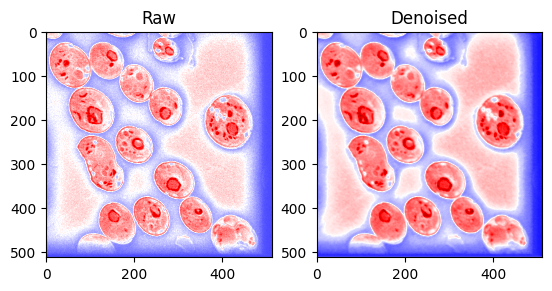

In [19]:
score_0_dn = imread(os.path.join(f_dir, model_name, 'denoised_scores', 'score_0000.tiff'))
plt.subplot(121)
nmax = np.max(np.abs(scores[...,0]))
plt.imshow(scores[...,0], vmin = -nmax, vmax = nmax, cmap = 'seismic')
plt.title('Raw'
plt.subplot(122)
nmax = np.max(np.abs(score_0_dn))
plt.imshow(score_0_dn, vmin = -nmax, vmax = nmax, cmap = 'seismic')
plt.title('Denoised')

And now verify the convergence of the training and validation data:

Text(0.5, 0, 'Epoch')

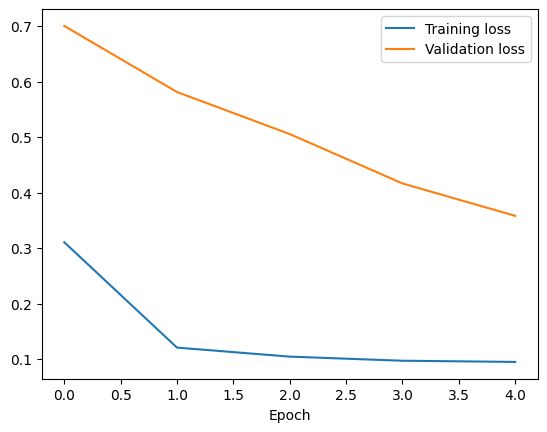

In [29]:
import pandas as pd
history_0 = pd.read_csv(os.path.join(f_dir, model_name, 'history', 'history_0000.csv'))
plt.plot(history_0['loss'], label = 'Training loss')
plt.plot(history_0['val_loss'], label = 'Validation loss')
plt.legend()
plt.xlabel('Epoch')

Upon a real denoising experiment, you should wait until the validation and training losses stabilize to achieve good results.

Let's now take a look at one of the denoised images from the reconstructed dataset.

Text(0.5, 1.0, 'Denoised')

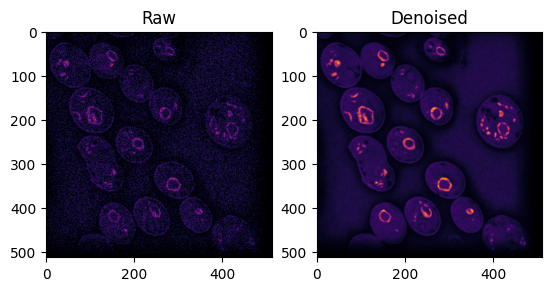

In [26]:
plt.subplot(121)
plt.imshow(data.reshape(new_shape)[...,1], cmap = 'inferno')
plt.title('Raw')
plt.subplot(122)
plt.imshow(data_dn.reshape(new_shape)[...,1], cmap = 'inferno')
plt.title('Denoised')